# Task 1

Test the hypothesis that the delay is from Normal distribution. and that mean of the delay is 0. Be careful about the outliers.

## Written plan

1.a Departure delays distribution
- remove cancelled flights
- remove nan from dep_delay
- remove outliers
- Plot dep_delay
- Perform the Shapiro-Wilk test for normality.
- Get mean and median

1.b Arrival delays distribution
- remove cancelled flights
- remove nan from dep_delay
- remove outliers
- Plot dep_delay
- Perform the Shapiro-Wilk test for normality.
- Get mean and median

In [613]:
#Import libraries

import pandas as pd
pd.set_option('display.max_columns', None) # Display all the columns
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
from datetime import datetime

In [6]:
#Import data
path = '../../../data/'
df = pd.read_csv(str(path)+"flights_sample_10.csv",low_memory=False)

In [111]:
df

Unnamed: 0     fl_date mkt_unique_carrier branded_code_share  \
0                 0  2018-05-29                 DL                 DL   
1                 1  2018-05-29                 DL                 DL   
2                 2  2018-05-29                 DL                 DL   
3                 3  2018-05-29                 DL                 DL   
4                 4  2018-05-29                 DL                 DL   
...             ...         ...                ...                ...   
1592439     1592439  2018-05-29                 DL                 DL   
1592440     1592440  2018-05-29                 DL                 DL   
1592441     1592441  2018-05-29                 DL                 DL   
1592442     1592442  2018-05-29                 DL                 DL   
1592443     1592443  2018-05-29                 DL                 DL   

        mkt_carrier  mkt_carrier_fl_num op_unique_carrier tail_num  \
0                DL                 551                DL   N945DL   
1                DL                 565                DL   N918DH   
2                DL                 658                DL   N990DL   
3                DL                 678                DL   N365NB   
4                DL                 724                DL   N819DN   
...             ...                 ...               ...      ...   
1592439          DL                 458                DL   N175DZ   
1592440          DL                 460                DL   N831MH   
1592441          DL                 465                DL   N3773D   
1592442          DL                 470                DL   N822DX   
1592443          DL                 496                DL   N854DN   

         op_carrier_fl_num  origin_airport_id origin    origin_city_name  \
0                      551              10397    ATL         Atlanta, GA   
1                      565              14100    PHL    Philadelphia, PA   
2                      658              10397    ATL         Atlanta, GA   
3                      678              11996    GSP           Greer, SC   
4                      724              14869    SLC  Salt Lake City, UT   
...                    ...                ...    ...                 ...   
1592439                458              12478    JFK        New York, NY   
1592440                460              12478    JFK        New York, NY   
1592441                465              14869    SLC  Salt Lake City, UT   
1592442                470              10397    ATL         Atlanta, GA   
1592443                496              13487    MSP     Minneapolis, MN   

         dest_airport_id dest             dest_city_name  crs_dep_time  \
0                  11995  GSO  Greensboro/High Point, NC          2331   
1                  11433  DTW                Detroit, MI           600   
2                  12448  JAN      Jackson/Vicksburg, MS          1950   
3                  11433  DTW                Detroit, MI           600   
4                  10849  BZN                Bozeman, MT          2220   
...                  ...  ...                        ...           ...   
1592439            12892  LAX            Los Angeles, CA          1355   
1592440            12892  LAX            Los Angeles, CA          1819   
1592441            13495  MSY            New Orleans, LA          1359   
1592442            12478  JFK               New York, NY          1340   
1592443            14107  PHX                Phoenix, AZ          1140   

         dep_time  dep_delay  taxi_out  wheels_off  wheels_on  taxi_in  \
0             2.0       31.0       9.0        11.0       52.0     12.0   
1           554.0       -6.0      12.0       606.0      715.0      8.0   
2          2016.0       26.0      33.0      2049.0     2046.0      7.0   
3           555.0       -5.0      11.0       606.0      722.0      7.0   
4          2301.0       41.0      10.0      2311.0        4.0      5.0   
...           ...        ...       ...       

### 1.A Departure Delays Distribution

In [18]:
# Remove canceled flights and dep_delay null values
df1a = df[(df.cancelled == 0) & df.dep_delay.notnull()]

In [19]:
x = df1a.dep_delay # all the values
xwo = x[x.between(x.quantile(.10), x.quantile(.90))] # remove outliers outliers

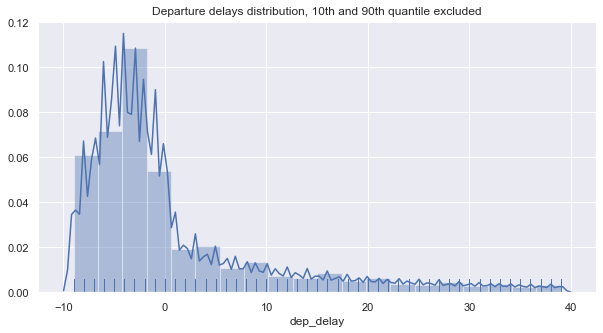

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(xwo, bins=20, rug=True).set_title('Departure delays distribution, 10th and 90th quantile excluded');

In [21]:
shapiro_test = stats.shapiro(xwo)
shapiro_test

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7743074893951416, pvalue=0.0)

In [22]:
print(f'Departure delay median : {xwo.median()}')
print(f'Departure delay mean : {xwo.mean()}')

Departure delay median : -2.0
Departure delay mean : 0.7856154846253857


### 1.B Arrival Delays Distribution

In [23]:
# Remove canceled flights and arr_delay with null values
df1b = df[(df.cancelled == 0) & df.arr_delay.notnull()]

In [24]:
x = df1b.arr_delay # all the values
xwo = x[x.between(x.quantile(.10), x.quantile(.90))] # without outliers

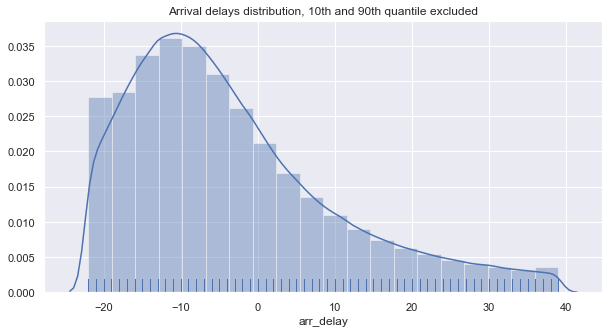

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(xwo, bins=20, rug=True).set_title('Arrival delays distribution, 10th and 90th quantile excluded');

In [26]:
shapiro_test = stats.shapiro(xwo)
shapiro_test

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.927739143371582, pvalue=0.0)

In [30]:
# Other statistical test ?

In [31]:
print(f'Arrival delay median : {xwo.median()}')
print(f'Arrival delay mean : {xwo.mean()}')

Arrival delay median : -6.0
Arrival delay mean : -3.2448565713430817


# Task 3
Does the weather affect the delay?
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:

sunny
cloudy
rainy
snow. Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

Written plan
- Select flights with weather delay
- Create columns dep_weather and arrival weather
- Create columns with dep_date_time and arrival_date_time
- query Visual crossing API and grap condition.



In [691]:
df3 = df[df.weather_delay >= 10]

In [706]:
df3 = df3.sort_values('weather_delay')

In [707]:
df3 = df3[df3.weather_delay.between(x.quantile(.05), x.quantile(.95))]
df3a = df3.sample(n = 200)
df3a['origin_weather'] = ""
df3a['dest_weather'] = ""
df3a = df3a[['fl_date','mkt_unique_carrier','mkt_carrier_fl_num','origin','origin_city_name','crs_dep_time','origin_weather','dest','dest_city_name','crs_arr_time','dest_weather','weather_delay']]
df3a.head(10)

fl_date mkt_unique_carrier  mkt_carrier_fl_num origin  \
840083   2019-06-17                 AA                 225    MIA   
1069325  2018-06-01                 DL                5176    GNV   
5357     2018-05-31                 AA                 659    CMH   
820260   2019-06-09                 DL                3479    JFK   
1065402  2019-02-28                 AA                2274    DFW   
260901   2018-07-31                 WN                 875    ATL   
856353   2019-06-24                 DL                3768    OMA   
836472   2019-06-16                 UA                3620    IAH   
502612   2019-07-16                 DL                2081    TPA   
17622    2018-02-06                 WN                1954    DAL   

              origin_city_name  crs_dep_time origin_weather dest  \
840083               Miami, FL          1553                 BOS   
1069325        Gainesville, FL          1925                 ATL   
5357              Columbus, OH          1629                 LAX   
820260            New York, NY           629                 DTW   
1065402  Dallas/Fort Worth, TX          1235                 SDF   
260901             Atlanta, GA          1630                 IND   
856353               Omaha, NE          1058                 LGA   
836472             Houston, TX          1830                 RDU   
502612               Tampa, FL          1745                 ATL   
17622               Dallas, TX          1845                 BNA   

             dest_city_name  crs_arr_time dest_weather  weather_delay  
840083           Boston, MA          1916                        26.0  
1069325         Atlanta, GA          2048                        17.0  
5357        Los Angeles, CA          1825                        33.0  
820260          Detroit, MI           830                        30.0  
1065402      Louisville, KY          1535                        22.0  
260901     Indianapolis, IN          1805                        38.0  
856353         New York, NY          1455                        12.0  
836472   Raleigh/Durham, NC          2224                        19.0  
502612          Atlanta, GA          1920                        18.0  
17622         Nashville, TN          2025                        17.0

In [708]:
df3a['crs_dep_time'] = df3a['crs_dep_time'].apply(lambda x: '{0:0>4}'.format(x))
df3a['crs_arr_time'] = df3a['crs_arr_time'].apply(lambda x: '{0:0>4}'.format(x))
df3a.reset_index(inplace=True)
df3a

index     fl_date mkt_unique_carrier  mkt_carrier_fl_num origin  \
0     840083  2019-06-17                 AA                 225    MIA   
1    1069325  2018-06-01                 DL                5176    GNV   
2       5357  2018-05-31                 AA                 659    CMH   
3     820260  2019-06-09                 DL                3479    JFK   
4    1065402  2019-02-28                 AA                2274    DFW   
..       ...         ...                ...                 ...    ...   
195   971139  2019-08-15                 AA                5180    HPN   
196  1366777  2019-12-16                 DL                2972    MSY   
197   506734  2019-07-18                 UA                 204    ORD   
198   344835  2019-04-07                 AA                 451    IAH   
199   279682  2019-05-08                 AA                2860    DFW   

          origin_city_name crs_dep_time origin_weather dest  \
0                Miami, FL         1553                 BOS   
1          Gainesville, FL         1925                 ATL   
2             Columbus, OH         1629                 LAX   
3             New York, NY         0629                 DTW   
4    Dallas/Fort Worth, TX         1235                 SDF   
..                     ...          ...            ...  ...   
195       White Plains, NY         1352                 CLT   
196        New Orleans, LA         1929                 JFK   
197            Chicago, IL         0805                 LAX   
198            Houston, TX         1209                 PHL   
199  Dallas/Fort Worth, TX         1929                 MFE   

                   dest_city_name crs_arr_time dest_weather  weather_delay  
0                      Boston, MA         1916                        26.0  
1                     Atlanta, GA         2048                        17.0  
2                 Los Angeles, CA         1825                        33.0  
3                     Detroit, MI         0830                        30.0  
4                  Louisville, KY         1535                        22.0  
..                            ...          ...          ...            ...  
195                 Charlotte, NC         1553                        31.0  
196                  New York, NY         2325                        12.0  
197               Los Angeles, CA         1042                        26.0  
198              Philadelphia, PA         1635                        27.0  
199  Mission/McAllen/Edinburg, TX         2058                        17.0  

[200 rows x 13 columns]

In [709]:
df3a['fl_date'] = pd.to_datetime(df3a['fl_date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
df3a['crs_dep_time'] = pd.to_datetime(df3a['crs_dep_time'], format='%H%M').dt.strftime('%H:%M')
df3a['crs_arr_time'] = pd.to_datetime(df3a['crs_arr_time'], format='%H%M').dt.strftime('%H:%M')
df3a

index     fl_date mkt_unique_carrier  mkt_carrier_fl_num origin  \
0     840083  2019-06-17                 AA                 225    MIA   
1    1069325  2018-06-01                 DL                5176    GNV   
2       5357  2018-05-31                 AA                 659    CMH   
3     820260  2019-06-09                 DL                3479    JFK   
4    1065402  2019-02-28                 AA                2274    DFW   
..       ...         ...                ...                 ...    ...   
195   971139  2019-08-15                 AA                5180    HPN   
196  1366777  2019-12-16                 DL                2972    MSY   
197   506734  2019-07-18                 UA                 204    ORD   
198   344835  2019-04-07                 AA                 451    IAH   
199   279682  2019-05-08                 AA                2860    DFW   

          origin_city_name crs_dep_time origin_weather dest  \
0                Miami, FL        15:53                 BOS   
1          Gainesville, FL        19:25                 ATL   
2             Columbus, OH        16:29                 LAX   
3             New York, NY        06:29                 DTW   
4    Dallas/Fort Worth, TX        12:35                 SDF   
..                     ...          ...            ...  ...   
195       White Plains, NY        13:52                 CLT   
196        New Orleans, LA        19:29                 JFK   
197            Chicago, IL        08:05                 LAX   
198            Houston, TX        12:09                 PHL   
199  Dallas/Fort Worth, TX        19:29                 MFE   

                   dest_city_name crs_arr_time dest_weather  weather_delay  
0                      Boston, MA        19:16                        26.0  
1                     Atlanta, GA        20:48                        17.0  
2                 Los Angeles, CA        18:25                        33.0  
3                     Detroit, MI        08:30                        30.0  
4                  Louisville, KY        15:35                        22.0  
..                            ...          ...          ...            ...  
195                 Charlotte, NC        15:53                        31.0  
196                  New York, NY        23:25                        12.0  
197               Los Angeles, CA        10:42                        26.0  
198              Philadelphia, PA        16:35                        27.0  
199  Mission/McAllen/Edinburg, TX        20:58                        17.0  

[200 rows x 13 columns]

## Get API request

In [735]:
import requests as re
import time
import os
import json


def get_weather(city_name, fl_date, crs_dep_time):
    #Date format : 2020-08-02THH%3AMM%3ASS
    startDateTime = str(fl_date)+'T'+crs_dep_time[:2]+'%3A'+crs_dep_time[-2:]+'%3A00'
    key = os.environ['VISUAL_CROSSING_API_KEY'] #real key in local variables
    url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/history?aggregateHours=24&combinationMethod=aggregate&startDateTime="+startDateTime+"&endDateTime="+startDateTime+"&collectStationContributions=false&maxStations=-1&maxDistance=-1&includeNormals=false&allowAsynch=true&contentType=json&unitGroup=metric&locationMode=single&key="+key+"&locations="+city_name
    res = re.get(url)
    data = json.loads(res.text)
    #time.sleep(1)
    return data


city_name=df3a.iloc[0]['origin_city_name']
fl_date=df3a.iloc[0]['fl_date']
crs_dep_time = df3a.iloc[0]['crs_dep_time']
get_weather(city_name, fl_date,crs_dep_time)
#str(fl_date)+'T%3A'+crs_dep_time+'T%3A00'
#str(fl_date)+'T'+crs_dep_time[:2]+'%3A'+crs_dep_time[-2:]+'%3A00'

{'errorCode': 999,
 'sessionId': '',
 'executionTime': -1,
 'message': 'You have exceeded the maximum number of daily query results for your account. See https://www.visualcrossing.com/weather-data-editions for information about our plans and how to get more weather data for free.'}

In [710]:
city_name=df3a.iloc[0]['origin_city_name']
city_name

'Miami, FL'

In [711]:
fl_date=df3a.iloc[0]['fl_date']
fl_date

'2019-06-17'

In [714]:
df3a.iloc[0]['crs_dep_time'][-2:]

'53'

In [ ]:
    attempts =0
    while attempts <= 5:
        attempts += 1
        resp = requests.get(url=url, params=params)
        data = json.loads(resp.text)
        response = data['meta']['code']
        # https://developer.foursquare.com/docs/places-api/errors/

        if  response == 200:
            returns = data
            break
        elif response == 403:
            time.sleep(10)
            continue
        else:
            returns = 'Search Error'
            break
    return returns

## Populate columns

In [ ]:
df3a['origin_weather'] = df3a.apply(lambda x: get_weather(x['origin_city_name'], x['fl_date'], x['crs_dep_time']), axis= 1)

# Task 5
5.A What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?)

5.B Are airlines able to lower the delay during the flights?

Written plan :

5.A
- We will be working with positive arrival delays only, represented in the delay breakwdown by carrier, weather, nas, security or late aircraft
- Get sum of late_aircraft_delay minutes /sum of all carrier_delay + weather_delay + nas_delay + security_delay + late_aircraft_delay
- Pie chart

5.B
- compare dep_delay to arr_delay
- Stretch : group by carrier

## 5.A Delay types pie chart

In [60]:
df5 = df[df.carrier_delay.notnull()]

In [62]:
df5a = df5[['mkt_unique_carrier','dep_delay','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']]
df5a

mkt_unique_carrier  dep_delay  arr_delay  carrier_delay  \
0                       DL       31.0       25.0            0.0   
2                       DL       26.0       43.0           18.0   
4                       DL       41.0       36.0           36.0   
9                       DL       29.0       32.0            6.0   
17                      DL       42.0       35.0           35.0   
...                    ...        ...        ...            ...   
1592409                 AA       84.0       80.0            0.0   
1592410                 AA       14.0       17.0            0.0   
1592418                 DL       58.0       69.0            0.0   
1592423                 DL       31.0       63.0           27.0   
1592430                 DL       21.0       16.0           16.0   

         weather_delay  nas_delay  security_delay  late_aircraft_delay  
0                  0.0        0.0             0.0                 25.0  
2                  0.0       17.0             0.0                  8.0  
4                  0.0        0.0             0.0                  0.0  
9                  0.0        3.0             0.0                 23.0  
17                 0.0        0.0             0.0                  0.0  
...                ...        ...             ...                  ...  
1592409            0.0        0.0             0.0                 80.0  
1592410            0.0        3.0             0.0                 14.0  
1592418           58.0       11.0             0.0                  0.0  
1592423            0.0       32.0             0.0                  4.0  
1592430            0.0        0.0             0.0                  0.0  

[300813 rows x 8 columns]

In [65]:
#Sanity check
sum_column = df5[['dep_delay','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']].sum(axis=0)
sum_column

dep_delay              18993682.0
arr_delay              20383987.0
carrier_delay           6133348.0
weather_delay           1130295.0
nas_delay               4912904.0
security_delay            28047.0
late_aircraft_delay     8179036.0
dtype: float64

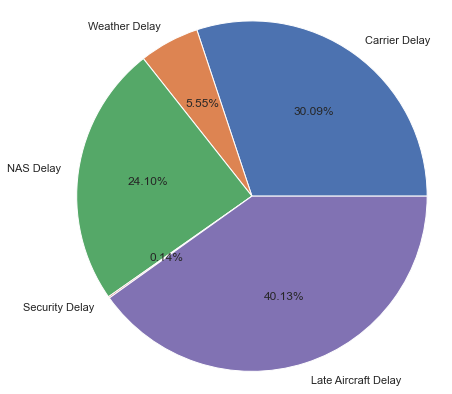

In [66]:
# Delay types pie chart
labels = ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']
sizes = [df5a.carrier_delay.sum(),
         df5a.weather_delay.sum(),
         df5a.nas_delay.sum(),
         df5a.security_delay.sum(),
         df5a.late_aircraft_delay.sum()
        ]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
plt.show()

## 5.B Delay types pie chart

In [71]:
df5a['delay_difference'] = df5a.arr_delay - df5a.dep_delay

In [93]:
#remove null
df5b = df5a[df5a.delay_difference.notnull()]
#remove outliers
df5b = df5a[df5a.delay_difference.between(x.quantile(.05), x.quantile(.95))]
df5b.sort_values('delay_difference')

mkt_unique_carrier  dep_delay  arr_delay  carrier_delay  \
524207                  DL      470.0      429.0            0.0   
1495067                 DL       90.0       49.0            0.0   
604261                  DL      316.0      275.0           52.0   
1370513                 UA       75.0       34.0            0.0   
726969                  UA       76.0       35.0            0.0   
...                    ...        ...        ...            ...   
1252821                 AS        0.0       21.0            0.0   
1065211                 AA       60.0       81.0            0.0   
626402                  DL       12.0       33.0           12.0   
1219019                 AS       15.0       36.0            0.0   
1534764                 UA       -5.0       16.0            0.0   

         weather_delay  nas_delay  security_delay  late_aircraft_delay  \
524207             0.0        0.0             0.0                429.0   
1495067           49.0        0.0             0.0                  0.0   
604261             0.0        0.0             0.0                223.0   
1370513            0.0        0.0             0.0                 34.0   
726969             0.0        0.0             0.0                 35.0   
...                ...        ...             ...                  ...   
1252821            0.0       21.0             0.0                  0.0   
1065211            0.0       21.0             0.0                 60.0   
626402             0.0       21.0             0.0                  0.0   
1219019            0.0       36.0             0.0                  0.0   
1534764            0.0       16.0             0.0                  0.0   

         delay_difference  
524207              -41.0  
1495067             -41.0  
604261              -41.0  
1370513             -41.0  
726969              -41.0  
...                   ...  
1252821              21.0  
1065211              21.0  
626402               21.0  
1219019              21.0  
1534764              21.0  

[246256 rows x 9 columns]

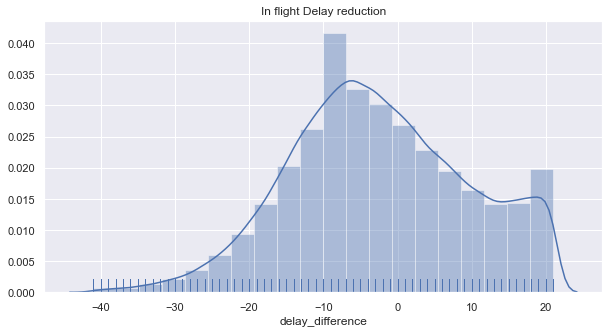

In [107]:
plt.figure(figsize=(10,5))
sns.distplot(df5b.delay_difference, bins=20, rug=True).set_title('In flight Delay reduction');

In [96]:
df5b.delay_difference.mean()

-2.5458709635501267

In [97]:
df5b.delay_difference.median()

-3.0

In [98]:
df5b.delay_difference.mode()

0   -6.0
dtype: float64

## 5.b Stretch : Carrier group by

In [108]:
df5b.groupby('mkt_unique_carrier').agg({'delay_difference': ['mean', 'median']}).sort_values(('delay_difference','mean'))

delay_difference       
                               mean median
mkt_unique_carrier                        
F9                        -4.906357   -6.0
B6                        -3.610085   -4.0
DL                        -3.420113   -4.0
WN                        -3.373023   -4.0
NK                        -3.295726   -4.0
UA                        -2.455185   -3.0
AA                        -1.843678   -2.0
G4                        -0.270033   -1.0
VX                         0.634241    2.0
AS                         0.856765    1.0
HA                         3.262314    3.0

# Task 7
Test the hypothesis whether planes fly faster when there is the departure delay?

Written plan : 
- create flight_number column as mkt_unique_carrier + mkt_carrier_fl_num
- Get flight_numbers value counts >= 100
- Get mean air_time per flight_number if dep_delay <= 0
- Get mean air_time per flight_number if dep_delay > 0
- Substract ontime airtime mean - delayed airtime mean

In [437]:
df7 = df[(df.dep_delay.notnull()) & (df.air_time.notnull()) & (df.cancelled == 0) & (df.diverted == 0)].copy()
df7.sort_values('dep_delay')

Unnamed: 0     fl_date mkt_unique_carrier branded_code_share  \
598503       598503  2018-01-31                 DL       DL_CODESHARE   
598508       598508  2018-01-31                 DL       DL_CODESHARE   
598531       598531  2018-01-31                 DL       DL_CODESHARE   
598515       598515  2018-01-31                 DL       DL_CODESHARE   
598528       598528  2018-01-31                 DL       DL_CODESHARE   
...             ...         ...                ...                ...   
776058       776058  2018-11-18                 AA                 AA   
1199336     1199336  2019-11-30                 G4                 G4   
1208711     1208711  2018-12-04                 DL       DL_CODESHARE   
356673       356673  2019-04-12                 AA       AA_CODESHARE   
1359010     1359010  2019-12-12                 AA       AA_CODESHARE   

        mkt_carrier  mkt_carrier_fl_num op_unique_carrier tail_num  \
598503           DL                5683                CP   N631CZ   
598508           DL                5743                CP   N607CZ   
598531           DL                6310                G7   N374CA   
598515           DL                5791                CP   N633CZ   
598528           DL                6281                G7   N368CA   
...             ...                 ...               ...      ...   
776058           AA                2074                AA   N950UW   
1199336          G4                1723                G4    307NV   
1208711          DL                5783                CP   N631CZ   
356673           AA                3654                MQ   N678AE   
1359010          AA                3253                OO   N727SK   

         op_carrier_fl_num  origin_airport_id origin  \
598503                5683              14747    SEA   
598508                5743              12892    LAX   
598531                6310              11433    DTW   
598515                5791              12892    LAX   
598528                6281              13487    MSP   
...                    ...                ...    ...   
776058                2074              10423    AUS   
1199336               1723              10135    ABE   
1208711               5783              14489    RDM   
356673                3654              11637    FAR   
1359010               3253              15096    SYR   

                       origin_city_name  dest_airport_id dest  \
598503                      Seattle, WA            14908  SNA   
598508                  Los Angeles, CA            14107  PHX   
598531                      Detroit, MI            11057  CLT   
598515                  Los Angeles, CA            14893  SMF   
598528                  Minneapolis, MN            13232  MDW   
...                                 ...              ...  ...   
776058                       Austin, TX            14100  PHL   
1199336  Allentown/Bethlehem/Easton, PA            11697  FLL   
1208711                Bend/Redmond, OR            14747  SEA   
356673                        Fargo, ND            13930  ORD   
1359010                    Syracuse, NY            13930  ORD   

              dest_city_name  crs_dep_time  dep_time  dep_delay  taxi_out  \
598503         Santa Ana, CA          1450    1134.0     -196.0      20.0   
598508           Phoenix, AZ          1112     805.0     -187.0      53.0   
598531         Charlotte, NC          1935    1652.0     -163.0      11.0   
598515        Sacramento, CA          1745    1518.0     -147.0      13.0   
598528           Chicago, IL          1511    1246.0     -145.0      23.0   
...                      ...           ...       ...        ...       ...   
776058      Philadelphia, PA           720    1307.0     1787.0       9.0   
1199336  Fort Lauderdale, FL          1919     214.0     1855.0       8.0   
1208711          Seattle, WA           545    1444.0     1979.0      12.0   
356673           Chicago, IL           540    1619.0     2079.0    

In [438]:
#df7['flight_number'] = df7['mkt_unique_carrier']+df7['op_carrier_fl_num'].astype(str)+df7['origin']+df7['dest']
df7['flight_number'] = df7['mkt_unique_carrier']+df7['op_carrier_fl_num'].astype(str)+df7['origin']+df7['dest']
df7.sort_values('flight_number')

Unnamed: 0     fl_date mkt_unique_carrier branded_code_share  \
959390       959390  2019-08-10                 AA                 AA   
1404868     1404868  2019-09-02                 AA                 AA   
964627       964627  2019-08-12                 AA                 AA   
1000684     1000684  2019-08-28                 AA                 AA   
486754       486754  2019-07-10                 AA                 AA   
...             ...         ...                ...                ...   
229780       229780  2018-07-18                 WN                 WN   
982076       982076  2019-08-20                 WN                 WN   
1006782     1006782  2019-08-30                 WN                 WN   
113166       113166  2018-09-24                 WN                 WN   
104618       104618  2018-09-20                 WN                 WN   

        mkt_carrier  mkt_carrier_fl_num op_unique_carrier tail_num  \
959390           AA                1002                AA   N918US   
1404868          AA                1002                AA   N114UW   
964627           AA                1002                AA   N756US   
1000684          AA                1002                AA   N104UW   
486754           AA                1002                AA   N680AW   
...             ...                 ...               ...      ...   
229780           WN                   9                WN   N7718B   
982076           WN                   9                WN   N558WN   
1006782          WN                   9                WN   N428WN   
113166           WN                   9                WN   N404WN   
104618           WN                   9                WN   N7721E   

         op_carrier_fl_num  origin_airport_id origin origin_city_name  \
959390                1002              11057    CLT    Charlotte, NC   
1404868               1002              11057    CLT    Charlotte, NC   
964627                1002              11057    CLT    Charlotte, NC   
1000684               1002              11057    CLT    Charlotte, NC   
486754                1002              11057    CLT    Charlotte, NC   
...                    ...                ...    ...              ...   
229780                   9              14730    SDF   Louisville, KY   
982076                   9              14831    SJC     San Jose, CA   
1006782                  9              14831    SJC     San Jose, CA   
113166                   9              15304    TPA        Tampa, FL   
104618                   9              15304    TPA        Tampa, FL   

         dest_airport_id dest dest_city_name  crs_dep_time  dep_time  \
959390             12478  JFK   New York, NY          1153    1151.0   
1404868            12478  JFK   New York, NY          1153    1200.0   
964627             12478  JFK   New York, NY          1153    1252.0   
1000684            12478  JFK   New York, NY          1153    1158.0   
486754             12478  JFK   New York, NY          1153    1153.0   
...                  ...  ...            ...           ...       ...   
229780             10821  BWI  Baltimore, MD          2025    2044.0   
982076             12889  LAS  Las Vegas, NV          1330    1330.0   
1006782            12889  LAS  Las Vegas, NV          1330    1404.0   
113166             11259  DAL     Dallas, TX           700     700.0   
104618             11259  DAL     Dallas, TX           700     659.0   

         dep_delay  taxi_out  wheels_off  wheels_on  taxi_in  crs_arr_time  \
959390        -2.0      28.0      1219.0     1343.0     10.0          1400   
1404868        7.0      21.0      1221.0     1427.0     15.0          1400   
964627        59.0      10.0      1302.0     1426.0     11.0          1400   
1000684        5.0      22.0      1220.0     1346.0     10.0          1400   
486754         0.0      28.0      1221.0     1346.0     16.0          1400   
...            ...       ...         ...        ...      ...           ...   
229

In [498]:
df7[df7['flight_number']== 'AA2137BOSLGA'].sort_values('air_time')

Unnamed: 0     fl_date mkt_unique_carrier branded_code_share  \
1444456     1444456  2019-09-20                 AA                 AA   
321318       321318  2019-05-27                 AA                 AA   
1165068     1165068  2019-11-14                 AA                 AA   
762892       762892  2018-11-12                 AA                 AA   
1061919     1061919  2019-02-26                 AA                 AA   
663375       663375  2018-08-29                 AA                 AA   
660186       660186  2018-08-28                 AA                 AA   
1530295     1530295  2019-01-31                 AA                 AA   
354134       354134  2019-04-11                 AA                 AA   
1426028     1426028  2019-09-12                 AA                 AA   
414788       414788  2019-03-08                 AA                 AA   
341232       341232  2019-04-05                 AA                 AA   
308256       308256  2019-05-21                 AA                 AA   
1423736     1423736  2019-09-11                 AA                 AA   
380124       380124  2019-04-22                 AA                 AA   
1223976     1223976  2018-12-11                 AA                 AA   
1009505     1009505  2019-02-01                 AA                 AA   
451669       451669  2019-03-25                 AA                 AA   
1323397     1323397  2018-10-26                 AA                 AA   
1047416     1047416  2019-02-19                 AA                 AA   
1513218     1513218  2019-01-23                 AA                 AA   
947016       947016  2019-08-05                 AA                 AA   
1515768     1515768  2019-01-24                 AA                 AA   
281884       281884  2019-05-09                 AA                 AA   
408215       408215  2019-03-05                 AA                 AA   
1360832     1360832  2019-12-13                 AA                 AA   
278059       278059  2019-05-08                 AA                 AA   
1501026     1501026  2019-01-17                 AA                 AA   
445561       445561  2019-03-22                 AA                 AA   
847681       847681  2019-06-20                 AA                 AA   
83645         83645  2018-09-11                 AA                 AA   

        mkt_carrier  mkt_carrier_fl_num op_unique_carrier tail_num  \
1444456          AA                2137                AA   N945UW   
321318           AA                2137                AA   N952UW   
1165068          AA                2137                AA   N963UW   
762892           AA                2137                AA   N965UW   
1061919          AA                2137                AA   N951UW   
663375           AA                2137                AA   N952UW   
660186           AA                2137                AA   N954UW   
1530295          AA                2137                AA   N958UW   
354134           AA                2137                AA   N951UW   
1426028          AA                2137                AA   N944UW   
414788           AA                2137                AA   N944UW   
341232           AA                2137                AA   N957UW   
308256           AA                2137                AA   N946UW   
1423736          AA                2137                AA   N961UW   
380124           AA                2137                AA   N948UW   
1223976          AA                2137                AA   N953UW   
1009505          AA                2137                AA   N949UW   
451669           AA                2137                AA   N946UW   
1323397          AA                2137                AA   N951UW   
1047416          AA                2137                AA   N965UW   
1513218          AA                2137                AA   N957UW   
947016           AA                2137                AA   N965UW   
1515768          AA                2137                AA   N9

In [441]:
df7['flight_number'].value_counts()

UA1768IAHTPA    98
UA778IADMCO     94
NK446LASORD     93
HA64LIHLAX      93
UA706OGGLAX     92
                ..
AA1900TULDFW     1
UA6152OKCIAH     1
WN4159ABQPHX     1
UA3933SYRORD     1
WN3178DENTUL     1
Name: flight_number, Length: 279314, dtype: int64

## Get only flight_number value counts >= 25

In [491]:
df7a = df7[df7.groupby('flight_number').flight_number.transform('count')>=25].copy()

In [492]:
df7a = df7a[['mkt_unique_carrier','flight_number','dep_delay','air_time','distance']]

In [526]:
df7a[df7a['flight_number']== 'AA5032AVPCLT'].sort_values('air_time')
#df7a

mkt_unique_carrier flight_number  dep_delay  air_time  distance
610353                  AA  AA5032AVPCLT      -11.0      73.0       509
953048                  AA  AA5032AVPCLT       -2.0      76.0       509
299217                  AA  AA5032AVPCLT       -5.0      80.0       509
301883                  AA  AA5032AVPCLT       -2.0      80.0       509
724174                  AA  AA5032AVPCLT       -8.0      81.0       509
985492                  AA  AA5032AVPCLT       -6.0      82.0       509
1339228                 AA  AA5032AVPCLT       -1.0      83.0       509
1424128                 AA  AA5032AVPCLT       -7.0      83.0       509
1088681                 AA  AA5032AVPCLT      -10.0      83.0       509
1461980                 AA  AA5032AVPCLT       -8.0      83.0       509
323875                  AA  AA5032AVPCLT       -6.0      84.0       509
670818                  AA  AA5032AVPCLT       -9.0      85.0       509
852814                  AA  AA5032AVPCLT       -9.0      86.0       509
1430875                 AA  AA5032AVPCLT       -8.0      86.0       509
1419801                 AA  AA5032AVPCLT       -6.0      86.0       509
1417680                 AA  AA5032AVPCLT       -9.0      86.0       509
1182474                 AA  AA5032AVPCLT       -7.0      87.0       509
814461                  AA  AA5032AVPCLT       -7.0      88.0       509
821610                  AA  AA5032AVPCLT       -6.0      88.0       509
1163659                 AA  AA5032AVPCLT       -5.0      89.0       509
976587                  AA  AA5032AVPCLT       -6.0      89.0       509
534944                  AA  AA5032AVPCLT        0.0      90.0       509
661885                  AA  AA5032AVPCLT       -4.0      90.0       509
489765                  AA  AA5032AVPCLT       -9.0      90.0       509
1198088                 AA  AA5032AVPCLT       -6.0      90.0       509
945720                  AA  AA5032AVPCLT       -7.0      90.0       509
1124087                 AA  AA5032AVPCLT       -5.0      90.0       509
263693                  AA  AA5032AVPCLT       -8.0      91.0       509
1433227                 AA  AA5032AVPCLT       -5.0      92.0       509
1158877                 AA  AA5032AVPCLT       -3.0      92.0       509
98709                   AA  AA5032AVPCLT       -3.0      92.0       509
502089                  AA  AA5032AVPCLT       -5.0      92.0       509
305522                  AA  AA5032AVPCLT       -8.0      92.0       509
809408                  AA  AA5032AVPCLT       -9.0      94.0       509
331239                  AA  AA5032AVPCLT       -5.0      95.0       509
1267247                 AA  AA5032AVPCLT       -5.0      95.0       509
736209                  AA  AA5032AVPCLT       -2.0      97.0       509
1297924                 AA  AA5032AVPCLT       -9.0      97.0       509
1511700                 AA  AA5032AVPCLT       -4.0      98.0       509
1185865                 AA  AA5032AVPCLT       -6.0      99.0       509
1332760                 AA  AA5032AVPCLT       -6.0      99.0       509
1278064                 AA  AA5032AVPCLT       -6.0      99.0       509
288524                  AA  AA5032AVPCLT       -5.0     100.0       509
413528                  AA  AA5032AVPCLT       -2.0     101.0       509
420067                  AA  AA5032AVPCLT      -10.0     102.0       509
342650                  AA  AA5032AVPCLT       -3.0     104.0       509
1305162                 AA  AA5032AVPCLT       -5.0     105.0       509
342830                  AA  AA5032AVPCLT       -3.0     105.0       509
1302748                 AA  AA5032AVPCLT       -8.0     106.0       509
1524111                 AA  AA5032AVPCLT      -10.0     106.0       509
1322389                 AA  AA5032AVPCLT       -9.0     106.0       509
432936                  AA  AA5032AVPCLT       -8.0     108.0       509
1230537                 AA  AA5032AVPCLT        4.0     109.0       509
1264413                 AA  AA5032AVPCLT       -4.0     110.0       509
1368636                 AA  AA5032AVPCLT      81

In [500]:
df7b = df7a.assign(
    on_time_air_time_mean = np.where(df7a['dep_delay'] <= 0 ,df7a.air_time,np.nan),
    delayed_air_time_mean = np.where(df7a['dep_delay'] >0, df7a.air_time,np.nan)
    ).groupby('flight_number').agg({'on_time_air_time_mean':'mean', 'delayed_air_time_mean':'mean'})

In [501]:
df7b['difference_in_minutes'] = df7b.on_time_air_time_mean - df7b.delayed_air_time_mean

In [642]:
df7b['pct_faster'] =  df7b.difference_in_minutes  / df7b.on_time_air_time_mean * 100

In [643]:
df7b = df7b[(df7b.on_time_air_time_mean.notnull()) & (df7b.delayed_air_time_mean.notnull())]

df7b.sort_values('difference_in_minutes')

on_time_air_time_mean  delayed_air_time_mean  \
flight_number                                                 
F9827TTNTPA               138.343750             204.333333   
AA2137BOSLGA               47.066667              82.000000   
AA429DCADFW               163.590909             194.250000   
UA233SATORD               132.645161             161.000000   
AA1098MCIDFW               73.093750             101.200000   
...                              ...                    ...   
UA389IADSEA               321.280000             301.875000   
HA5LASHNL                 364.823529             345.318182   
G41647PSMPGD              191.529412             171.250000   
UA5994DFWSFO              210.400000             188.000000   
DL456JFKSLC               271.958333             248.000000   

               difference_in_minutes  pct_faster  
flight_number                                     
F9827TTNTPA               -65.989583  -47.699721  
AA2137BOSLGA              -34.933333  -74.220963  
AA429DCADFW               -30.659091  -18.741317  
UA233SATORD               -28.354839  -21.376459  
AA1098MCIDFW              -28.106250  -38.452330  
...                              ...         ...  
UA389IADSEA                19.405000    6.039903  
HA5LASHNL                  19.505348    5.346516  
G41647PSMPGD               20.279412   10.588145  
UA5994DFWSFO               22.400000   10.646388  
DL456JFKSLC                23.958333    8.809560  

[13668 rows x 4 columns]

In [651]:
df7c = df7b[df7b.difference_in_minutes.between(x.quantile(.10), x.quantile(.90))]
df7c.sort_values('difference_in_minutes')

on_time_air_time_mean  delayed_air_time_mean  \
flight_number                                                 
B6471BOSSJC               357.687500             373.354839   
AS1174SFOEWR              292.523810             308.125000   
UA2001EWRORD              113.172414             128.750000   
UA1599IAHRSW              103.272727             118.833333   
UA3720DENATL              142.681818             158.000000   
...                              ...                    ...   
UA389IADSEA               321.280000             301.875000   
HA5LASHNL                 364.823529             345.318182   
G41647PSMPGD              191.529412             171.250000   
UA5994DFWSFO              210.400000             188.000000   
DL456JFKSLC               271.958333             248.000000   

               difference_in_minutes  pct_faster  
flight_number                                     
B6471BOSSJC               -15.667339   -4.380175  
AS1174SFOEWR              -15.601190   -5.333306  
UA2001EWRORD              -15.577586  -13.764473  
UA1599IAHRSW              -15.560606  -15.067488  
UA3720DENATL              -15.318182  -10.735903  
...                              ...         ...  
UA389IADSEA                19.405000    6.039903  
HA5LASHNL                  19.505348    5.346516  
G41647PSMPGD               20.279412   10.588145  
UA5994DFWSFO               22.400000   10.646388  
DL456JFKSLC                23.958333    8.809560  

[13643 rows x 4 columns]

In [652]:
#df7c.pct_faster.between(x.quantile(.05), x.quantile(.95))

In [653]:
df7c.mean()

on_time_air_time_mean    115.051273
delayed_air_time_mean    114.826415
difference_in_minutes      0.224858
pct_faster                -0.134357
dtype: float64

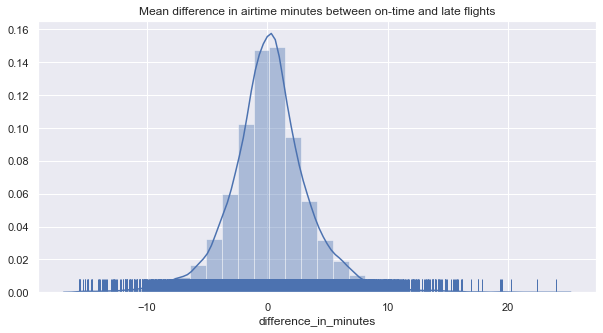

In [654]:
plt.figure(figsize=(10,5))
sns.distplot(df7c.difference_in_minutes, bins=30, rug=True).set_title('Mean difference in airtime minutes between on-time and late flights');

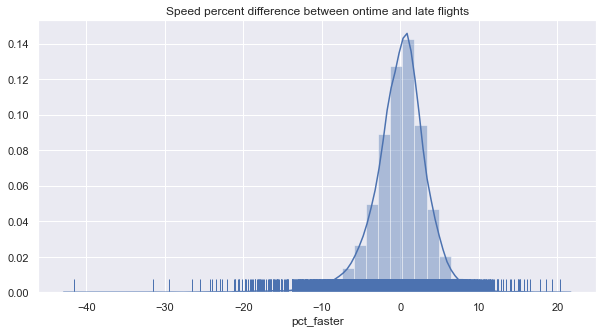

In [662]:
plt.figure(figsize=(10,5))
sns.distplot(df7c.pct_faster, bins=40, rug=True).set_title('Speed percent difference between ontime and late flights');

# Task 9

9.A Find the top 10 the busiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport?

9.B How much traffic do these 10 airports cover?

Written plan
- Sum of departure flights by origin Airport
- Sum of arrival flights by destination Arport. 
- Sum of departing passengers by origin Airport
- Sum of arriving passengers by destination Arport. 


In [742]:
df9a = pd.DataFrame(df.origin.value_counts().head(30))
df9a 

origin
ORD   78881
ATL   78303
DFW   58492
DEN   55013
LAX   50335
CLT   50167
SEA   37819
SFO   35515
PHX   35474
IAH   35333
DTW   35283
LGA   34245
LAS   33202
MSP   32728
EWR   32004
PHL   31102
BOS   30474
DCA   28876
MCO   28164
JFK   25875
SLC   23865
BWI   21338
SAN   19536
FLL   19536
IAD   18646
MIA   17634
PDX   17338
MDW   17169
BNA   15981
TPA   15248

In [743]:
df9b = pd.DataFrame(df.dest.value_counts().head(30))
df9b

dest
ATL  79111
ORD  78940
DFW  58554
DEN  54986
CLT  50333
LAX  49948
SEA  37680
SFO  35863
PHX  35779
IAH  35459
DTW  34914
LGA  34280
LAS  33254
MSP  32370
EWR  31954
PHL  30890
BOS  30207
DCA  28782
MCO  28131
JFK  25524
SLC  24004
BWI  21252
SAN  19564
FLL  19402
IAD  18562
MIA  17574
PDX  17251
MDW  17131
BNA  15883
TPA  15292

In [744]:
df9c = pd.merge(df9a, df9b, left_index=True, right_index=True)
df9c

origin   dest
ORD   78881  78940
ATL   78303  79111
DFW   58492  58554
DEN   55013  54986
LAX   50335  49948
CLT   50167  50333
SEA   37819  37680
SFO   35515  35863
PHX   35474  35779
IAH   35333  35459
DTW   35283  34914
LGA   34245  34280
LAS   33202  33254
MSP   32728  32370
EWR   32004  31954
PHL   31102  30890
BOS   30474  30207
DCA   28876  28782
MCO   28164  28131
JFK   25875  25524
SLC   23865  24004
BWI   21338  21252
SAN   19536  19564
FLL   19536  19402
IAD   18646  18562
MIA   17634  17574
PDX   17338  17251
MDW   17169  17131
BNA   15981  15883
TPA   15248  15292

In [746]:
df9 = pd.read_csv(str(path)+"passengers.csv",low_memory=False)

In [747]:
df9.sort_values('passengers')

departures_scheduled  departures_performed   payload   seats  \
792657                      0                     1     35000     155   
309238                     18                    18   1334765       0   
309237                     18                    18    538106       0   
309236                     18                    18   2217912       0   
309235                     18                    18   1404942       0   
...                       ...                   ...       ...     ...   
475868                    479                   472  23515320   93919   
1416582                   826                   826  26150900  105728   
1416581                   826                   826  26152000  105728   
1416595                   849                   849  26894100  108672   
1416594                   849                   849  26884800  108672   

         passengers  freight   mail  distance  ramp_to_ramp  air_time  \
792657            0        0      0      1010           157       138   
309238            0   701147      0       268          1162       840   
309237            0   534463      0       110           518       384   
309236            0  1062226   4020       325          1252       869   
309235            0   524505      0       868          2372      2045   
...             ...      ...    ...       ...           ...       ...   
475868        86623    67490  51068       404         40908     28628   
1416582       88925   178136      0       100         32526     19248   
1416581       89172   479493      0       100         35030     18054   
1416595       93733   172433      0       100         32774     19602   
1416594       95777   492915      0       100         35812     18548   

        unique_carrier  airline_id  \
792657              WL       20310   
309238              5X       19917   
309237              5X       19917   
309236              5X       19917   
309235              5X       19917   
...                ...         ...   
475868              DL       19790   
1416582             HA       19690   
1416581             HA       19690   
1416595             HA       19690   
1416594             HA       19690   

                                       unique_carrier_name region carrier  \
792657   Caribbean Sun Airlines, Inc. d/b/a World Atlan...      D      WL   
309238                               United Parcel Service      D      5X   
309237                               United Parcel Service      D      5X   
309236                               United Parcel Service      D      5X   
309235                               United Parcel Service      D      5X   
...                                                    ...    ...     ...   
475868                                Delta Air Lines Inc.      D      DL   
1416582                             Hawaiian Airlines Inc.      D      HA   
1416581                             Hawaiian Airlines Inc.      D      HA   
1416595                             Hawaiian Airlines Inc.      D      HA   
1416594                             Hawaiian Airlines Inc.      D      HA   

                                              carrier_name  carrier_group  \
792657   Caribbean Sun Airlines, Inc. d/b/a World Atlan...              1   
309238                               United Parcel Service              3   
309237                               United Parcel Service              3   
309236                               United Parcel Service              3   
309235                               United Parcel Service              3   
...                                                    ...            ...   
475868                                Delta Air Lines Inc.              3   
1416582                             Hawaiian Airlines Inc.              3   
1416581                             Hawaiian Airlines Inc.              3   
1416595                             Hawaiian Airlines Inc.              3   
1416594                   

In [748]:
df9d = pd.DataFrame(df9.groupby(['origin'])['passengers'].agg('sum').sort_values(ascending=False).head(30))
df9e

passengers
dest            
ATL    257786488
LAX    205188513
ORD    194589089
DFW    164225714
DEN    151120966
JFK    150154185
SFO    134024630
LAS    117605384
SEA    114272139
CLT    113164033
MCO    109963674
PHX    109563915
EWR    106177828
MIA    105283415
IAH    103980407
BOS     94247873
MSP     92356861
DTW     86274605
FLL     79546187
PHL     75947080
LGA     74129158
BWI     64809774
SLC     58586738
DCA     57434709
SAN     56859704
IAD     56239204
MDW     55088713
TPA     49714744
HNL     49606805
PDX     46609722

In [749]:
df9e = pd.DataFrame(df9.groupby(['dest'])['passengers'].agg('sum').sort_values(ascending=False).head(30))
df9e

passengers
dest            
ATL    257786488
LAX    205188513
ORD    194589089
DFW    164225714
DEN    151120966
JFK    150154185
SFO    134024630
LAS    117605384
SEA    114272139
CLT    113164033
MCO    109963674
PHX    109563915
EWR    106177828
MIA    105283415
IAH    103980407
BOS     94247873
MSP     92356861
DTW     86274605
FLL     79546187
PHL     75947080
LGA     74129158
BWI     64809774
SLC     58586738
DCA     57434709
SAN     56859704
IAD     56239204
MDW     55088713
TPA     49714744
HNL     49606805
PDX     46609722

In [750]:
df9f = pd.merge(df9d, df9e, left_index=True, right_index=True)
df9f

passengers_x  passengers_y
ATL     257478059     257786488
LAX     205745255     205188513
ORD     194019087     194589089
DFW     163888490     164225714
DEN     151024252     151120966
JFK     148927079     150154185
SFO     133266076     134024630
LAS     117526251     117605384
SEA     113960665     114272139
CLT     112838675     113164033
PHX     109444579     109563915
MCO     109139647     109963674
EWR     106492502     106177828
MIA     105306021     105283415
IAH     103908868     103980407
BOS      93806182      94247873
MSP      92228521      92356861
DTW      86099463      86274605
FLL      79167634      79546187
PHL      75550139      75947080
LGA      74230970      74129158
BWI      64962142      64809774
SLC      58712013      58586738
DCA      57364637      57434709
SAN      57038361      56859704
IAD      55830622      56239204
MDW      54851397      55088713
TPA      49831137      49714744
HNL      49633077      49606805
PDX      46608224      46609722

In [751]:
df9g = pd.merge(df9c, df9f, left_index=True, right_index=True)
df9g

origin   dest  passengers_x  passengers_y
ORD   78881  78940     194019087     194589089
ATL   78303  79111     257478059     257786488
DFW   58492  58554     163888490     164225714
DEN   55013  54986     151024252     151120966
LAX   50335  49948     205745255     205188513
CLT   50167  50333     112838675     113164033
SEA   37819  37680     113960665     114272139
SFO   35515  35863     133266076     134024630
PHX   35474  35779     109444579     109563915
IAH   35333  35459     103908868     103980407
DTW   35283  34914      86099463      86274605
LGA   34245  34280      74230970      74129158
LAS   33202  33254     117526251     117605384
MSP   32728  32370      92228521      92356861
EWR   32004  31954     106492502     106177828
PHL   31102  30890      75550139      75947080
BOS   30474  30207      93806182      94247873
DCA   28876  28782      57364637      57434709
MCO   28164  28131     109139647     109963674
JFK   25875  25524     148927079     150154185
SLC   23865  24004      58712013      58586738
BWI   21338  21252      64962142      64809774
SAN   19536  19564      57038361      56859704
FLL   19536  19402      79167634      79546187
IAD   18646  18562      55830622      56239204
MIA   17634  17574     105306021     105283415
PDX   17338  17251      46608224      46609722
MDW   17169  17131      54851397      55088713
TPA   15248  15292      49831137      49714744

In [752]:
df9g = df9g.rename(columns={"origin": "Departures", "dest": "Arrivals","passengers_x": "Departing_passengers","passengers_y": "Arriving_passengers"})

In [754]:
df9g = df9g.sort_values('Departing_passengers',ascending=False).head(15)
df9g 

Departures  Arrivals  Departing_passengers  Arriving_passengers
ATL       78303     79111             257478059            257786488
LAX       50335     49948             205745255            205188513
ORD       78881     78940             194019087            194589089
DFW       58492     58554             163888490            164225714
DEN       55013     54986             151024252            151120966
JFK       25875     25524             148927079            150154185
SFO       35515     35863             133266076            134024630
LAS       33202     33254             117526251            117605384
SEA       37819     37680             113960665            114272139
CLT       50167     50333             112838675            113164033
PHX       35474     35779             109444579            109563915
MCO       28164     28131             109139647            109963674
EWR       32004     31954             106492502            106177828
MIA       17634     17574             105306021            105283415
IAH       35333     35459             103908868            103980407

<Figure size 432x288 with 0 Axes>

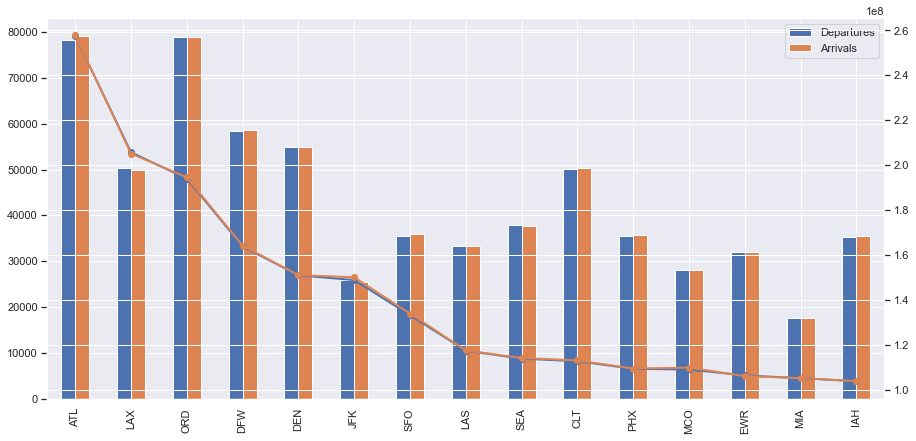

In [755]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = df9g[['Departures','Arrivals']].plot(kind='bar', use_index=True,figsize=(15,7))
ax2 = ax.twinx()

ax2.plot(ax.get_xticks(),
         df9g[['Departing_passengers','Arriving_passengers']].values,
         linestyle='-',
         marker='o', linewidth=2.0)